# Transformations, Eigenvectors, and Eigenvalues

Matrices and vectors are used together to manipulate spatial dimensions. This has a lot of applications, including the mathematical generation of 3D computer graphics, geometric modeling, and the training and optimization of machine learning algorithms. We're not going to cover the subject exhaustively here; but we'll focus on a few key concepts that are useful to know when you plan to work with machine learning.

## Linear Transformations
You can manipulate a vector by multiplying it with a matrix. The matrix acts a function that operates on an input vector to produce a vector output. Specifically, matrix multiplications of vectors are *linear transformations* that transform the input vector into the output vector.

For example, consider this matrix ***A*** and vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

We can define a transformation ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

To perform this transformation, we simply calculate the dot product by applying the *RC* rule; multiplying each row of the matrix by the single column of the vector:

$$\begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\end{bmatrix}$$

Here's the calculation in R:

In [1]:
v = c(1,2)
v
A = matrix(c(2,5,3,2), ncol = 2, nrow = 2)
A
A %*% v

[1] 1 2

2,3
5,2


8
9


In this case, both the input vector and the output vector have 2 components - in other words, the transformation takes a 2-dimensional vector and produces a new 2-dimensional vector; which we can indicate like this:

$$ T: \rm I\!R^{2} \to \rm I\!R^{2} $$

Note that the output vector may have a different number of dimensions from the input vector; so the matrix function might transform the vector from one space to another - or in notation, ${\rm I\!R}$<sup>n</sup> -> ${\rm I\!R}$<sup>m</sup>.

For example, let's redefine matrix ***A***, while retaining our original definition of vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

Now if we once again define ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

We apply the transformation like this:

$$\begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\\3\end{bmatrix}$$

So now, our transformation transforms the vector from 2-dimensional space to 3-dimensional space:

$$ T: \rm I\!R^{2} \to \rm I\!R^{3} $$

Here it is in R:

In [2]:
A = matrix(c(2,5,1,3,2,1), nrow = 3, ncol = 2)
A
A %*% v

2,3
5,2
1,1


8
9
3


## Transformations of Magnitude and Amplitude

When you multiply a vector by a matrix, you transform it in at least one of the following two ways:
* Scale the length (*magnitude*) of the matrix to make it longer or shorter
* Change the direction (*amplitude*) of the matrix

For example consider the following matrix and vector:

$$ A = \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\0\end{bmatrix}$$

As before, we transform the vector ***v*** by multiplying it with the matrix ***A***:

\begin{equation}\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}\end{equation}

In this case, the resulting vector has changed in length (*magnitude*), but has not changed its direction (*amplitude*).

Let's visualize that in R:

[1] 1 0

2,0
0,2


2
0


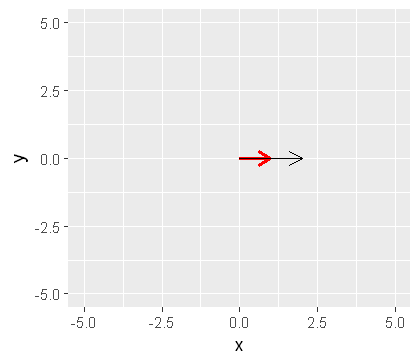

In [3]:
library(ggplot2)
library(repr)
options(repr.plot.width=3.5, repr.plot.height=3) # Set the initial plot area dimensions

v = c(1,0)
v

A = matrix(c(2,0,0,2), ncol = 2, nrow = 2)
A
t = A %*% v
t

## Create a data frame with v and t
v = data.frame(x=c(0,v[1]), y=c(0,v[2]))
t = data.frame(x=c(0,t[1]), y=c(0,t[2]))


## Plot the vector
ggplot() + 
      geom_line(data = v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'red', size = 1) + 
      geom_line(data = t, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), size = 0.5) +
      xlim(-5,5) + ylim(-5,5)

The original vector ***v*** is shown in orange, and the transformed vector ***t*** is shown in blue - note that ***t*** has the same direction (*amplitude*) as ***v*** but a greater length (*magnitude*).

Now let's use a different matrix to transform the vector ***v***:
\begin{equation}\begin{bmatrix}0 & -1\\1 & 0\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}\end{equation}

This time, the resulting vector has been changed to a different amplitude, but has the same magnitude.

[1] 1 0

0,-1
1,0


0
1


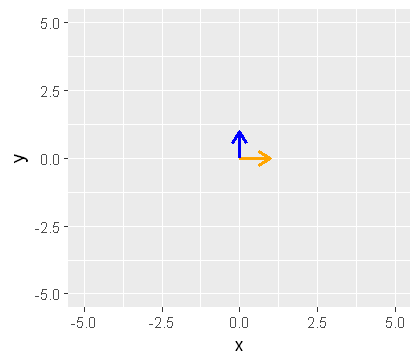

In [4]:
v = c(1,0)
v

A = matrix(c(0,1,-1,0), ncol = 2, nrow = 2)
A
t = A %*% v
t

## Create a data frame with v and t
v = data.frame(x=c(0,v[1]), y=c(0,v[2]))
t = data.frame(x=c(0,t[1]), y=c(0,t[2]))


## Plot the vector
ggplot() + 
      geom_line(data = v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'orange', size = 1) + 
      geom_line(data = t, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'blue', size = 1) +
      xlim(-5,5) + ylim(-5,5)

Now let's see change the matrix one more time:
\begin{equation}\begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\1\end{bmatrix}\end{equation}

Now our resulting vector has been transformed to a new amplitude *and* magnitude - the transformation has affected both direction and scale.

[1] 1 0

2,1
1,2


2
1


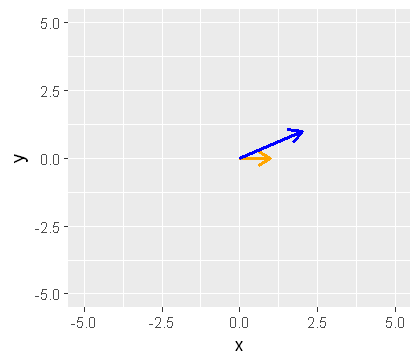

In [5]:
v = c(1,0)
v

A = matrix(c(2,1,1,2), ncol = 2, nrow = 2)
A
t = A %*% v
t

## Create a data frame with v and t
v = data.frame(x=c(0,v[1]), y=c(0,v[2]))
t = data.frame(x=c(0,t[1]), y=c(0,t[2]))


## Plot the vector
ggplot() + 
      geom_line(data = v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'orange', size = 1) + 
      geom_line(data = t, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'blue', size = 1) +
      xlim(-5,5) + ylim(-5,5)

### Afine Transformations
An Afine transformation multiplies a vector by a matrix and adds an offset vector, sometimes referred to as *bias*; like this:

$$T(\vec{v}) = A\vec{v} + \vec{b}$$

For example:

\begin{equation}\begin{bmatrix}5 & 2\\3 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\1\end{bmatrix} + \begin{bmatrix}-2\\-6\end{bmatrix} = \begin{bmatrix}-1.5\\2.5\end{bmatrix}\end{equation}

This kind of transformation is actually the basis of linear regression, which is a core foundation for machine learning. The matrix defines the *features*, the first vector is the *coefficients*, and the bias vector is the *intercept*.

here's an example of an Afine transformation in R:

[1] 1 0

5,2
3,1


[1] -2 -6

3
-3


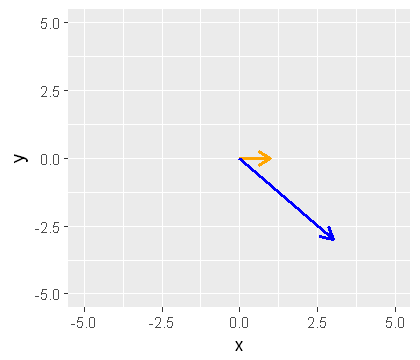

In [6]:
v = c(1,0)
v

A = matrix(c(5,3,2,1), ncol = 2, nrow = 2)
A
b = c(-2,-6)
b 
t = A %*% v + b
t

## Create a data frame with v and t
v = data.frame(x=c(0,v[1]), y=c(0,v[2]))
t = data.frame(x=c(0,t[1]), y=c(0,t[2]))


## Plot the vector
ggplot() + 
      geom_line(data = v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'orange', size = 1) + 
      geom_line(data = t, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'blue', size = 1) +
      xlim(-5,5) + ylim(-5,5)

## Eigenvectors and Eigenvalues
So we can see that when you transform a vector using a matrix, we change its direction, length, or both. When the transformation only affects scale (in other words, the output vector has a different magnitude but the same amplitude as the input vector), the matrix multiplication for the transformation is the equivalent operation as some scalar multiplication of the vector.

For example, earlier we examined the following transformation that dot-mulitplies a vector by a matrix:

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

You can achieve the same result by mulitplying the vector by the scalar value ***2***:

$$2 \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

The following R code performs both of these calculation and shows the results, which are identical.

[1] 1 0

2,0
0,2


2
0


[1] 2 0

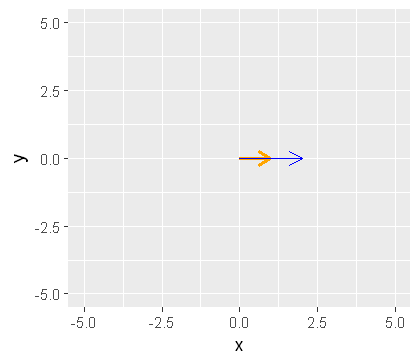

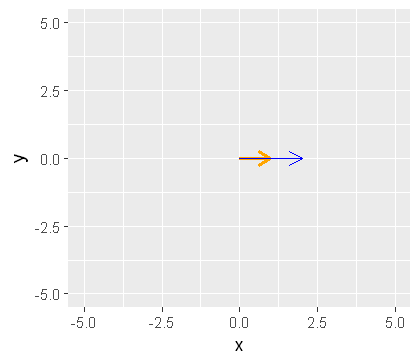

In [7]:
v = c(1,0)
v

A = matrix(c(2,0,0,2), ncol = 2, nrow = 2)
A

t1 = A %*% v
t1
t2 = 2 * v
t2

## Create a data frame with v, t1, and t2
v = data.frame(x=c(0,v[1]), y=c(0,v[2]))
t1 = data.frame(x=c(0,t1[1]), y=c(0,t1[2]))
t2 = data.frame(x=c(0,t2[1]), y=c(0,t2[2]))


## Plot t1
ggplot() + 
      geom_line(data = v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'orange', size = 1) + 
      geom_line(data = t1, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'blue') +
      xlim(-5,5) + ylim(-5,5)

## Plot t2
ggplot() + 
      geom_line(data = v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'orange', size = 1) + 
      geom_line(data = t2, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'blue') +
      xlim(-5,5) + ylim(-5,5)

In cases like these, where a matrix transformation is the equivelent of a scalar-vector multiplication, the scalar-vector pairs that correspond to the matrix are known respectively as eigenvalues and eigenvectors. We generally indicate eigenvalues using the Greek letter lambda (&lambda;), and the formula that defines eigenvalues and eigenvectors with respect to a transformation is:

$$ T(\vec{v}) = \lambda\vec{v}$$

Where the vector ***v*** is an eigenvector and the value ***&lambda;*** is an eigenvalue for transformation ***T***.

When the transformation ***T*** is represented as a matrix multiplication, as in this case where the transformation is represented by matrix ***A***:

$$ T(\vec{v}) = A\vec{v} = \lambda\vec{v}$$

Then  ***v*** is an eigenvector and ***&lambda;*** is an eigenvalue of ***A***.

A matrix can have multiple eigenvector-eigenvalue pairs, and you can calculate them manually. However, it's generally easier to use a tool or programming language. For example, in R the **eigen** function returns a list with the eigenvalues and eigenvalues of a square matrix.

Here's an example that returns the eigenvalue and eigenvector pairs for the following matrix:

$$A=\begin{bmatrix}2 & 0\\0 & 3\end{bmatrix}$$

In [8]:
A = matrix(c(2,0,0,3), ncol = 2, nrow = 2)
A

eigens = eigen(A)
eigens$val
eigens$vec

2,0
0,3


[1] 3 2

0,-1
1,0


So there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$\lambda_{1} = 3, \vec{v_{1}} = \begin{bmatrix}0 \\ 1\end{bmatrix}   \;\;\;\;\;\;  \lambda_{2} = 2, \vec{v_{2}} = \begin{bmatrix}-1 \\ 0\end{bmatrix}$$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 3 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix} $$

So far so good. Now let's check the second pair:

$$ 2 \times \begin{bmatrix}-1 \\ 0\end{bmatrix} = \begin{bmatrix}-2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}-1 \\ 0\end{bmatrix} = \begin{bmatrix}-2 \\ 0\end{bmatrix} $$

So our eigenvalue-eigenvector scalar multiplications do indeed correspond to our matrix-eigenvector dot-product transformations.

Here's the equivalent code in R using the previous results:

In [9]:
cat('Matrix A \n')
A
cat('---------- \n')
cat(paste('First eigenvalue = ', as.character(eigens$val[1]), '\n'))
cat('First eigenvector:')
eigens$vec[,1]
cat(paste('Second eigenvalue = ', as.character(eigens$val[2]), '\n'))
cat('Second eigenvector:')
eigens$vec[,2]
cat('first eigenvalue * eigenvetor \n')
v1 = eigens$val[1] * eigens$vec[,1]
v1
cat('matrix %*% first eigenvalue')
A %*% eigens$vec[,1]
cat('second eigenvalue * eigenvetor \n')
v2 = eigens$val[2] * eigens$vec[,2]
v2
cat('matrix %*% second eigenvalue')
A %*% eigens$vec[,2]

Matrix A 


2,0
0,3


---------- 
First eigenvalue =  3 
First eigenvector:

[1] 0 1

Second eigenvalue =  2 
Second eigenvector:

[1] -1  0

first eigenvalue * eigenvetor 


[1] 0 3

matrix %*% first eigenvalue

0
3


second eigenvalue * eigenvetor 


[1] -2  0

matrix %*% second eigenvalue

-2
0


You can use the following code to visualize these transformations:

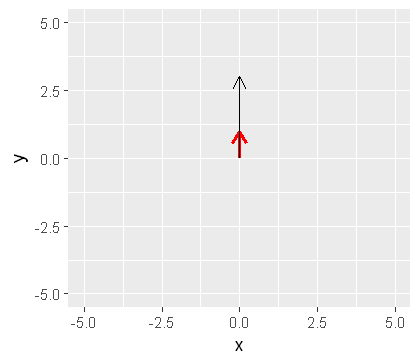

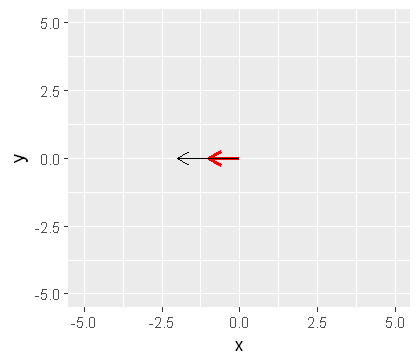

In [10]:
## Data frames for the first eigen vector plot
w1 = data.frame(x = c(0,eigens$vec[1,1]), y = c(0,eigens$vec[2,1]))
v1 = data.frame(x = c(0,v1[1]), y = c(0,v1[2]))

## Plot the multplications with first vector
ggplot() + 
      geom_line(data = w1, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'red', size = 1) + 
      geom_line(data = v1, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), size = 0.5) +
      xlim(-5,5) + ylim(-5,5)

## Data frames for the second eigen vector plot
w2 = data.frame(x = c(0,eigens$vec[1,2]), y = c(0,eigens$vec[2,2]))
v2 = data.frame(x = c(0,v2[1]), y = c(0,v2[2]))

## Plot the multplications with first vector
ggplot() + 
      geom_line(data = w2, aes(x,y), arrow = arrow(length=unit(0.30,"cm"), ends = "first"), color = 'red', size = 1) + 
      geom_line(data = v2, aes(x,y), arrow = arrow(length=unit(0.30,"cm"), ends = "first"), size = 0.5) +
      xlim(-5,5) + ylim(-5,5)

Similarly, earlier we examined the following matrix transformation:

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}-1\\0\end{bmatrix} = \begin{bmatrix}-2\\0\end{bmatrix}$$

And we saw that you can achieve the same result by mulitplying the vector by the scalar value ***2***:

$$2 \times \begin{bmatrix}-1\\0\end{bmatrix} = \begin{bmatrix}-2\\0\end{bmatrix}$$

This works because the scalar value 2 and the vector (1,0) are an eigenvalue-eigenvector pair for this matrix.

Let's use R to determine the eigenvalue-eigenvector pairs for this matrix:

In [11]:
A = matrix(c(2,0,0,2), nrow = 2, ncol = 2)
A

eigens = eigen(A)
eigens$val
eigens$vec

2,0
0,2


[1] 2 2

0,-1
1,0


So once again, there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$\lambda_{1} = 2, \vec{v_{1}} = \begin{bmatrix}0 \\ 1\end{bmatrix}   \;\;\;\;\;\;   \lambda_{2} = 2, \vec{v_{2}} = \begin{bmatrix}-1 \\ 0\end{bmatrix}$$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 2 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 2\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 2\end{bmatrix} $$

Well, we already knew that. Now let's check the second pair:

$$ 2 \times \begin{bmatrix}-1 \\ 0\end{bmatrix} = \begin{bmatrix}-2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}-1 \\ 0\end{bmatrix} = \begin{bmatrix}-2 \\ 0\end{bmatrix} $$


Now let's use R to verify and plot these transformations:

Matrix A 


2,0
0,2


---------- 
First eigenvalue =  2 
First eigenvector:

[1] 0 1

Second eigenvalue =  2 
Second eigenvector:

[1] -1  0

first eigenvalue * eigenvetor 


[1] 0 2

matrix %*% first eigenvalue

0
2


second eigenvalue * eigenvetor 


[1] -2  0

matrix %*% second eigenvalue

-2
0


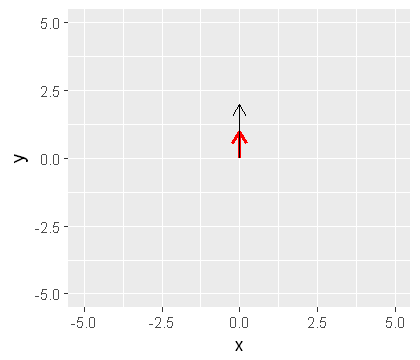

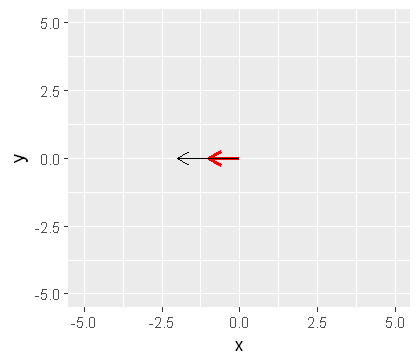

In [12]:
cat('Matrix A \n')
A
cat('---------- \n')
cat(paste('First eigenvalue = ', as.character(eigens$val[1]), '\n'))
cat('First eigenvector:')
eigens$vec[,1]
cat(paste('Second eigenvalue = ', as.character(eigens$val[2]), '\n'))
cat('Second eigenvector:')
eigens$vec[,2]
cat('first eigenvalue * eigenvetor \n')
v1 = eigens$val[1] * eigens$vec[,1]
v1
cat('matrix %*% first eigenvalue')
A %*% eigens$vec[,1]
cat('second eigenvalue * eigenvetor \n')
v2 = eigens$val[2] * eigens$vec[,2]
v2
cat('matrix %*% second eigenvalue')
A %*% eigens$vec[,2]

## Data frames for the first eigen vector plot
w1 = data.frame(x = c(0,eigens$vec[1,1]), y = c(0,eigens$vec[2,1]))
v1 = data.frame(x = c(0,v1[1]), y = c(0,v1[2]))

## Plot the multplications with first vector
ggplot() + 
      geom_line(data = w1, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'red', size = 1) + 
      geom_line(data = v1, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), size = 0.5) +
      xlim(-5,5) + ylim(-5,5)

## Data frames for the second eigen vector plot
w2 = data.frame(x = c(0,eigens$vec[1,2]), y = c(0,eigens$vec[2,2]))
v2 = data.frame(x = c(0,v2[1]), y = c(0,v2[2]))

## Plot the multplications with first vector
ggplot() + 
      geom_line(data = w2, aes(x,y), arrow = arrow(length=unit(0.30,"cm"), ends = "first"), color = 'red', size = 1) + 
      geom_line(data = v2, aes(x,y), arrow = arrow(length=unit(0.30,"cm"), ends = "first"), size = 0.5) +
      xlim(-5,5) + ylim(-5,5)

Let's take a look at one more, slightly more complex example. Here's our matrix:

$$\begin{bmatrix}2 & 1\\1 & 2\end{bmatrix}$$

Let's get the eigenvalue and eigenvector pairs:

In [13]:
A = matrix(c(2,1,1,2), nrow = 2, ncol = 2)
A

eigens = eigen(A)
eigens$val
eigens$vec

2,1
1,2


[1] 3 1

0.7071068,-0.7071068
0.7071068,0.7071068


This time the eigenvalue-eigenvector pairs are:

$$ \lambda_{1} = 3, \vec{v_{1}} = \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 1, \vec{v_{2}} = \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} $$

So let's check the first pair:

$$ 3 \times \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix} $$

Now let's check the second pair:

$$ 1 \times \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix} $$

With more complex examples like this, it's generally easier to use a tool like R:

Matrix A 


2,1
1,2


---------- 
First eigenvalue =  3 
First eigenvector:

[1] 0.7071068 0.7071068

Second eigenvalue =  1 
Second eigenvector:

[1] -0.7071068  0.7071068

first eigenvalue * eigenvetor 


[1] 2.12132 2.12132

matrix %*% first eigenvalue

2.12132
2.12132


second eigenvalue * eigenvetor 


[1] -0.7071068  0.7071068

matrix %*% second eigenvalue

-0.7071068
0.7071068


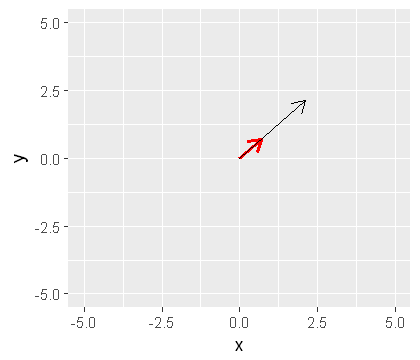

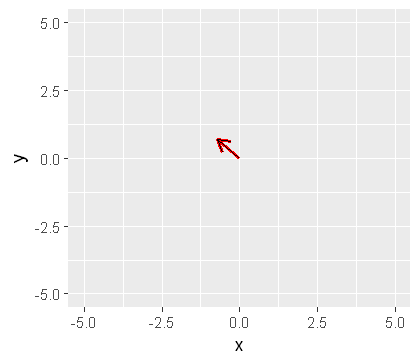

In [14]:
cat('Matrix A \n')
A
cat('---------- \n')
cat(paste('First eigenvalue = ', as.character(eigens$val[1]), '\n'))
cat('First eigenvector:')
eigens$vec[,1]
cat(paste('Second eigenvalue = ', as.character(eigens$val[2]), '\n'))
cat('Second eigenvector:')
eigens$vec[,2]
cat('first eigenvalue * eigenvetor \n')
v1 = eigens$val[1] * eigens$vec[,1]
v1
cat('matrix %*% first eigenvalue')
A %*% eigens$vec[,1]
cat('second eigenvalue * eigenvetor \n')
v2 = eigens$val[2] * eigens$vec[,2]
v2
cat('matrix %*% second eigenvalue')
A %*% eigens$vec[,2]

## Data frames for the first eigen vector plot
w1 = data.frame(x = c(0,eigens$vec[1,1]), y = c(0,eigens$vec[2,1]))
v1 = data.frame(x = c(0,v1[1]), y = c(0,v1[2]))

## Plot the multplications with first vector
ggplot() + 
      geom_line(data = w1, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), color = 'red', size = 1) + 
      geom_line(data = v1, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), size = 0.5) +
      xlim(-5,5) + ylim(-5,5)

## Data frames for the second eigen vector plot
w2 = data.frame(x = c(0,eigens$vec[1,2]), y = c(0,eigens$vec[2,2]))
v2 = data.frame(x = c(0,v2[1]), y = c(0,v2[2]))

## Plot the multplications with first vector
ggplot() + 
      geom_line(data = w2, aes(x,y), arrow = arrow(length=unit(0.30,"cm"), ends = "first"), color = 'red', size = 1) + 
      geom_line(data = v2, aes(x,y), arrow = arrow(length=unit(0.30,"cm"), ends = "first"), size = 0.5) +
      xlim(-5,5) + ylim(-5,5)

## Eigendecomposition
So we've learned a little about eigenvalues and eigenvectors; but you may be wondering what use they are. Well, one use for them is to help decompose transformation matrices.

Recall that previously we found that a matrix transformation of a vector changes its magnitude, amplitude, or both. Without getting too technical about it, we need to remember that vectors can exist in any spatial orientation, or *basis*; and the same transformation can be applied in different *bases*.

We can decompose a matrix using the following formula:

$$A = Q \Lambda Q^{-1}$$

Where ***A*** is a trasformation that can be applied to a vector in its current base, ***Q*** is a matrix of eigenvectors that defines a change of basis, and ***&Lambda;*** is a matrix with eigenvalues on the diagonal that defines the same linear transformation as ***A*** in the base defined by ***Q***.

Let's look at these in some more detail. Consider this matrix:

$$A=\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix}$$

***Q*** is a matrix in which each column is an eigenvector of ***A***; which as we've seen previously, we can calculate using R:

In [15]:
A = matrix(c(3,1,2,0), nrow =2, ncol =2)
eigens = eigen(A)
Q = eigens$vec
Q

0.9627697,-0.4896337
0.2703230,0.8719282


So for matrix ***A***, ***Q*** is the following matrix:

$$Q=\begin{bmatrix}0.96276969 & -0.48963374\\0.27032301 & 0.87192821\end{bmatrix}$$

$\Lambda$ is a matrix that contains the eigenvalues for ***A*** on the diagonal, with zeros in all other elements; so for a 2x2 matrix, &Lambda; will look like this:

$$\Lambda=\begin{bmatrix}\lambda_{1} & 0\\0 & \lambda_{2}\end{bmatrix}$$

You have already used the R **eigen** function to compute the eigenvalues of a square matrix. The code below uses the **diag** function to create a diagonal matrix of the eigenvalues of $A$.

In [16]:
L = diag(eigens$val)
L

3.561553,0.0000000
0.000000,-0.5615528


So **$\Lambda$** is the following matrix:

$$\Lambda=\begin{bmatrix}3.56155281 & 0\\0 & -0.56155281\end{bmatrix}$$

Now we just need to find ***Q<sup>-1</sup>***, which is the inverse of ***Q***:

In [17]:
Qinv = solve(Q)
Qinv

0.8972067,0.5038290
-0.2781601,0.9906818


The inverse of ***Q*** then, is:

$$Q^{-1}=\begin{bmatrix}0.89720673 & 0.50382896\\-0.27816009 & 0.99068183\end{bmatrix}$$

So what does that mean? Well, it means that we can decompose the transformation of *any* vector multiplied by matrix ***A*** into the separate operations ***Q&Lambda;Q<sup>-1</sup>***:

$$A\vec{v} = Q \Lambda Q^{-1}\vec{v}$$

To prove this, let's take vector ***v***:

$$\vec{v} = \begin{bmatrix}1\\3\end{bmatrix} $$

Our matrix transformation using ***A*** is:

$$\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix} \cdot \begin{bmatrix}1\\3\end{bmatrix} $$

So let's show the results of that using R:

[1] 1 3

9
1


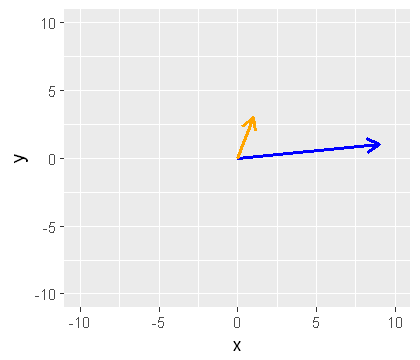

In [18]:
v = c(1,3)
v
t = A %*% v
t

## Data frames for the vector plot
df_v = data.frame(x = c(0,v[1]), y = c(0,v[2]))
df_t = data.frame(x = c(0,t[1]), y = c(0,t[2]))

## Plot the vectors
ggplot() + 
      geom_line(data = df_t, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), 
                color = 'blue', size = 1) + 
      geom_line(data = df_v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), 
                color = 'orange', size = 1) +
      xlim(-10,10) + ylim(-10,10)

And now, let's do the same thing using the ***Q&Lambda;Q<sup>-1</sup>*** sequence of operations:

9
1


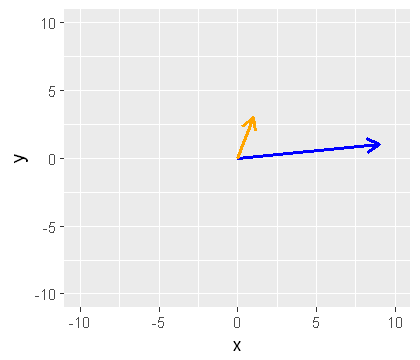

In [19]:
t = Q %*% L %*% Qinv %*% v
t

## Data frame for the vector plot
df_t = data.frame(x = c(0,t[1]), y = c(0,t[2]))

## Plot the vectors
ggplot() + 
      geom_line(data = df_t, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), 
                color = 'blue', size = 1) + 
      geom_line(data = df_v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), 
                color = 'orange', size = 1) +
      xlim(-10,10) + ylim(-10,10)

So ***A*** and ***Q&Lambda;Q<sup>-1</sup>*** are equivalent.

If we view the intermediary stages of the decomposed transformation, you can see the transformation using ***A*** in the original base for ***v*** (orange to blue) and the transformation using ***&Lambda;*** in the change of basis decribed by ***Q*** (red to magenta):

[1] 1

2.408694
2.693885


8.578689
-1.512759


9
1


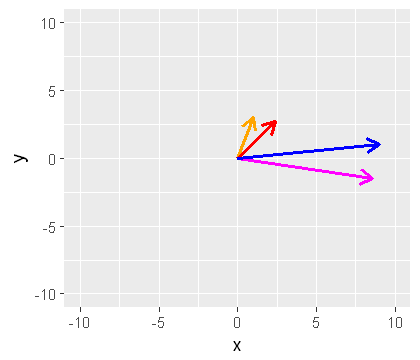

In [20]:
1## Matrix multiplication for intermediate steps
t1 = Qinv %*% v
t1
t2 = L %*% t1
t2
t3 = Q %*% t2
t3

## Data frames for the vector plot
df_t1 = data.frame(x = c(0,t1[1]), y = c(0,t1[2]))
df_t2 = data.frame(x = c(0,t2[1]), y = c(0,t2[2]))
df_t3 = data.frame(x = c(0,t3[1]), y = c(0,t3[2]))

## Plot the vectors
ggplot() + 
    geom_line(data = df_v, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), 
                color = 'orange', size = 1) +
    geom_line(data = df_t1, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), 
                color = 'red', size = 1) + 
    geom_line(data = df_t2, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), 
                color = 'magenta', size = 1) + 
    geom_line(data = df_t3, aes(x,y), arrow = arrow(length=unit(0.30,"cm")), 
                color = 'blue', size = 1) +
    xlim(-10,10) + ylim(-10,10)    

So from this visualization, it should be apparent that the transformation ***Av*** can be performed by changing the basis for ***v*** using ***Q*** (from orange to red in the above plot) applying the equivalent linear transformation in that base using ***&Lambda;*** (red to magenta), and switching back to the original base using ***Q<sup>-1</sup>*** (magenta to blue).

## Rank of a Matrix

The **rank** of a square matrix is the number of non-zero eigenvalues of the matrix. A **full rank** matrix has the same number of non-zero eigenvalues as the dimension of the matrix. A **rank-deficient** matrix has fewer non-zero eigenvalues as dimensions. The inverse of a rank deficient matrix is singular and so does not exist (this is why in a previous notebook we noted that some matrices have no inverse).

Consider the following matrix ***A***:

$$A=\begin{bmatrix}1 & 2\\4 & 3\end{bmatrix}$$

Let's find its eigenvalues (***&Lambda;***):

In [31]:
A = matrix(c(1,4,2,3), nrow =2, ncol =2)
eigens_A = eigen(A)
L = diag(eigens_A$val)
L

5,0
0,-1


$$\Lambda=\begin{bmatrix}5 & 0\\0 & -1\end{bmatrix}$$

This matrix has full rank. The dimensions of the matrix is 2. There are two non-zero eigenvalues. 

Now consider this matrix:

$$B=\begin{bmatrix}3 & -3 & 6\\2 & -2 & 4\\1 & -1 & 2\end{bmatrix}$$

Note that the second and third columns are just scalar multiples of the first column.

Let's examine it's eigenvalues:

In [23]:
B = matrix(c(3,2,1,-3,-2,-1,6,4,2), nrow =3, ncol =3)
eigens_B = eigen(B)
L = diag(eigens_B$val)
L

3,0.000000e+00,0
0,5.233642e-16,0
0,0.000000e+00,0


Within a small numerical error, these eigenvalues are:

$$\Lambda=\begin{bmatrix}3 & 0& 0\\0 & 0 & 0\\0 & 0 & 0\end{bmatrix}$$

Note that matrix has only 1 non-zero eigenvalue. The other two eigenvalues are so extremely small as to be effectively zero. This is an example of a rank-deficient matrix; and as such, it has no inverse.

## Inverse of a Square Full Rank Matrix
You can calculate the inverse of a square full rank matrix by using the following formula:

$$A^{-1} = Q \Lambda^{-1} Q^{-1}$$

Let's apply this to matrix ***A***:

$$A=\begin{bmatrix}1 & 2\\4 & 3\end{bmatrix}$$

You have already performed the eigen decomposition of A. Next, find the matrices for ***Q***, ***&Lambda;<sup>-1</sup>***, and ***Q<sup>-1</sup>***:

In [27]:
Linv = solve(diag(eigens_A$val))
Linv
Q = eigens_A$vec
Q
Qinv = solve(Q)
Qinv

0.2,0
0.0,-1


-0.4472136,-0.7071068
-0.8944272,0.7071068


-0.745356,-0.7453560
-0.942809,0.4714045


So:

$$A^{-1}=\begin{bmatrix}-0.4472136 & -0.70710678 \\-0.89442719 & 0.70710678 \end{bmatrix}\cdot\begin{bmatrix}0.2 & 0\\0 & -1\end{bmatrix}\cdot\begin{bmatrix}-0.74535599 & 0.47140452\\-0.94280904 & -0.74535599\end{bmatrix}$$

Let's calculate that with R:

In [29]:
Ainv = Q %*% Linv %*% Qinv
Ainv

-0.6,0.4
0.8,-0.2


That gives us the result:

$$A^{-1}=\begin{bmatrix}-0.6 & 0.4\\0.8 & -0.2\end{bmatrix}$$

We can apply the **solve** function directly to **Ainv** to verify this:

In [30]:
solve(Ainv)

1,2
4,3


Which is the original matrix A. 

You can also use R verify that:

$$A^{-1}A = I \\
A A^{-1} = I$$

In [32]:
Ainv %*% A
A %*% Ainv

1.000000e+00,2.220446e-16
1.110223e-16,1.000000e+00


1,1.110223e-16
0,1.000000e+00
